In [ ]:
*Boosting: Bagging과 다르게, 병렬이 아닌 직렬적으로 연결된 앙상블 기법
- Boosting은 오분류된 데이터에 집중해 더 많은 가중치를 주는 ensemble 기법
- Strong model vs. Weak model
- Weak 모델: 랜덤 모델에 비해 “약간＂의 성능 개선이 있는 모델
    --> 적절한 조취를 취해 성능이 우수한 모델로 boosted 되게하자!
- 특징은, 각 모델이 서로에게 dependent(model guided)한 성질을 지녀 다양성 측면에서 explicit함
(과정)
- 첫 라운드에서, learner에서는 모든 데이터가 동일한 가중치를 갖지만 각 라운드가 종료될 때마다,
- 가중치와 중요도를 계산함. 그후, 복원추출을 진행할 때 가중치의 분포를 고려함.
- 가중치의 분포가 고려되며 오분류된 데이터에 가중치를 더 높게 잡아 다음 round에서 더 많이 반영함.

<Boosting 계열 모델>
1. Adaptive Boosting(AdaBoost)
2. Gradient Boosting Machine(GBM)
3. XGBoost
4. LightGBM
5. CatBoost

*위 5가지의 모델을 동일한 조건에서 비교실험을 추가함

## Dataset: otto_train data

In [39]:
otto_train_data = pd.read_csv("./data/otto_train.csv")
otto_train_data = otto_train_data.drop(['id'], axis=1)
otto_train_data

,feat_1,feat_2,feat_3,feat_4,feat_5,feat_6,feat_7,feat_8,feat_9,feat_10,...,feat_85,feat_86,feat_87,feat_88,feat_89,feat_90,feat_91,feat_92,feat_93,target
0,1,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,Class_1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Class_1
3,1,0,0,1,6,1,5,0,0,1,...,0,1,2,0,0,0,0,0,0,Class_1
4,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,Class_1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61873,1,0,0,1,1,0,0,0,0,0,...,1,0,0,0,0,0,0,2,0,Class_9
61874,4,0,0,0,0,0,0,0,0,0,...,0,2,0,0,2,0,0,1,0,Class_9
61875,0,0,0,0,0,0,0,3,1,0,...,0,3,1,0,0,0,0,0,0,Class_9
61876,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,3,10,0,Class_9


In [40]:
mapping_dict = {'Class_1' : 1,
                'Class_2' : 2,
                'Class_3' : 3,
                'Class_4' : 4,
                'Class_5' : 5,
                'Class_6' : 6,
                'Class_7' : 7,
                'Class_8' : 8,
                'Class_9' : 9,}
after_mapping_target = otto_train_data['target'].apply(lambda x : mapping_dict[x])
after_mapping_target

0        1
1        1
2        1
3        1
4        1
        ..
61873    9
61874    9
61875    9
61876    9
61877    9
Name: target, Length: 61878, dtype: int64

In [41]:
feature_columns = list(otto_train_data.columns.difference(['target']))
X = otto_train_data[feature_columns]
y = after_mapping_target


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=1234)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape) # 데이터 개수 확인

(43314, 93) (18564, 93) (43314,) (18564,)


## Adaptive Boosting(AdaBoost)

In [ ]:
* AdsBoost에선 이전단계에서의 단점을 데이터분포에 반영시키면서 모델의 성능을 향상시킴.
* 가장 기본적인 AdabBoost의 base learner(estimator)는 depth가 1인 DecisionTree임
* 분기횟수(depth)를 증가시키고,
* 추정횟수(n_estimators)를 증가시키면서 비교 실험하였음

In [49]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from mlxtend.plotting import plot_decision_regions
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [69]:
#Case1. AdaBoost with base learner
AB_clf = AdaBoostClassifier(n_estimators=50, random_state=0)
AB_clf.fit(X_train, y_train) 
pred=AB_clf.predict(X_test)
print(accuracy_score(y_test, pred)*100,'%')

70.0387847446671 %


In [70]:
#Case2. Depth

##Case2-1. AdaBoost with base learner(depth=5)
de_tree = DecisionTreeClassifier(max_depth=5)
AB_clf = AdaBoostClassifier(base_estimator=de_tree, n_estimators=50, random_state=0)
AB_clf.fit(X_train, y_train) 
pred=AB_clf.predict(X_test)
print(accuracy_score(y_test, pred)*100,'%')

59.572290454643394 %


In [71]:
##Case2-2. AdaBoost with deeper Decision Tree(depth=10)
de_tree = DecisionTreeClassifier(max_depth=10)
AB_clf = AdaBoostClassifier(base_estimator=de_tree, n_estimators=50, random_state=0)
AB_clf.fit(X_train, y_train) 
pred=AB_clf.predict(X_test)
print(accuracy_score(y_test, pred)*100,'%')

70.56130144365439 %


In [68]:
#Case3. Nubmer of Estimate
# 수행시간 측정
start_time = time.time()
de_tree = DecisionTreeClassifier(max_depth=10)
AB_clf = AdaBoostClassifier(base_estimator=de_tree, n_estimators=100, random_state=0)
AB_clf.fit(X_train, y_train) 
pred=AB_clf.predict(X_test)
print('AdaBoost 정확도: {:.4f}%'.format(accuracy_score(y_test, pred)*100))
print('AdaBoost 수행 시간: {:.2f}초'.format(time.time() - start_time))

AdaBoost 정확도: 72.4790%
AdaBoost 수행 시간: 28.94초


In [ ]:
* 실험결과: AdaBoost를 통해 boosting의 기본적인 개념은 이전 단계에서 맞추지 못한 데이터들의 영향력을
    키워 다음 단계에서 더 잘 맞추게 유도하는 것임을 알았다. Tree계열의 모델을 base model로 할때에는
    주로 depth(leaf노드까지의 분기수라고 이해하면 편함)를 깊게하고 추정횟수를 더 많이 하는것이 성능이
    제일 좋은 것을 확인하였다.
    

## Gradient Boosting Machine(GBM)

In [ ]:
* AdaBoost와 비슷한 boosting 계열의 모델이지만,
* GBM에선 가중치 업데이트를 Gradient Descent를 이용해 회귀모형의 잔차를 예측하는 모델임
* AdaBoost에선 전 단계의 단점이 '데이터의 선택확률'에 반영되지만,
* GBM에선 '잔차'를 구하는 '손실함수의 gradient'에 반영됨

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.metrics import accuracy_score
import time

In [66]:
# GBM 수행시간 측정
start_time = time.time()


# GBM 로드 및 훈련/테스트
GB_clf = GradientBoostingClassifier(learning_rate=0.1,
                                    max_depth = 10,
                                    n_estimators=100,
                                    random_state=1234)
GB_clf.fit(X_train, y_train)
GB_pred = GB_clf.predict(X_test)
GB_accuracy = accuracy_score(y_test, GB_pred)

print('GBM 정확도: {:.4f}%'.format(GB_accuracy*100))
print('GBM 수행 시간: {:.2f}초'.format(time.time() - start_time))

GBM 정확도: 81.5988%
GBM 수행 시간: 255.74초


In [67]:
# GBM 수행시간 측정
start_time = time.time()


# GBM 로드 및 훈련/테스트
GB_clf = GradientBoostingClassifier(learning_rate=0.1,
                                    max_depth = 20,
                                    n_estimators = 50,
                                    random_state =1234)
GB_clf.fit(X_train, y_train)
GB_pred = GB_clf.predict(X_test)
GB_accuracy = accuracy_score(y_test, GB_pred)

print('GBM 정확도: {:.4f}%'.format(GB_accuracy*100))
print('GBM 수행 시간: {:.2f}초'.format(time.time() - start_time))

GBM 정확도: 80.0205%
GBM 수행 시간: 325.64초


In [ ]:
*결과해석: AdaBoost와 동일한 조건(max_depth = 10, n_estimator=100)으로 진행하였을때보다 성능이 '9%'이상
    향상된 것을 볼 수 있다. 단순히 데이터의 분포를 바꾸어가며 boosting을 하는 것 보단, 손실함수의 
    gradient에 반영하여 모델을 훈련시키는 것이 해당 데이터에선 보다 효과적임을 알았다. 
    그러나, 시간적인 측면을 보자면 AdaBoost에 비해 '8.8배 오래'걸리는 것은 충분히 고려해야할 사항이다.
    
    추가로, GBM내에서 성능을 향상시키고자 tree의 depth를 2배로 증가시켜 20을 만들고 반복횟수를 100에서
    50회로 낮추어 진행을 한 결과, 성능이 오히려 감소되었다. 특정데이터에서 tree의 depth를 높게 잡는 것
    이 더 정확한 분류가 가능한 것이라 예상하였으나, 과적합으로 인한 정확도 감소를 보였다.

## XGBoost

In [ ]:
* GBM은 위 실험에서 알 수 있듯이, Adaboost보다 100배의 시간이 걸리고, 과적합의 이슈가 있었음
* 이러한 단점을 보완하기 위해 XGBoost가 탄생함
* 전역을 탐색한 분기점이 아니라, 'locally 최적split을 찾으므로' GBM 보다 빠르고,
* 과적합을 방지하기 위해 규제를 포함시킴

In [104]:
import xgboost as xgb
from xgboost import plot_importance
import time
import matplotlib.pyplot as plt

In [105]:
start_time = time.time()

XGB_train = xgb.DMatrix(data = X_train, label = y_train) # 학습 데이터를 XGBoost에 맞게 변환
XGB_test = xgb.DMatrix(data = X_test) # 테스트 데이터를 XGBoost에 맞게 변환
XGB_param = {'max_depth': 10, # tree의 detpth
             'n_estimators': 100, # tree의 반복횟수(생성갯수)
             'objective': 'multi:softmax', # 목적 함수
             'num_class': len(set(y_train)) + 1} # 라벨개수(0~개수)
XGB_model = xgb.train(params = XGB_param, dtrain = XGB_train) # 학습
XGB_model_predict = XGB_model.predict(XGB_test) # 테스트 

print('XGBoost 정확도: {:.4f}%'.format(accuracy_score(y_test, XGB_model_predict)*100))
print('XGBoost 수행 시간: {:.2f}초'.format(time.time() - start_time))

[17:18:35] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


XGBoost 정확도: 79.5626%
XGBoost 수행 시간: 1.26초


In [97]:
start_time = time.time()

XGB_train = xgb.DMatrix(data = X_train, label = y_train) # 학습 데이터를 XGBoost에 맞게 변환
XGB_test = xgb.DMatrix(data = X_test) # 테스트 데이터를 XGBoost에 맞게 변환
XGB_param = {'max_depth': 20, # tree의 detpth
             'n_estimators': 100, # tree의 반복횟수(생성갯수)
             'objective': 'multi:softmax', # 목적 함수
             'num_class': len(set(y_train)) + 1} # 라벨개수(0~개수)
XGB_model = xgb.train(params = XGB_param, dtrain = XGB_train) # 학습
XGB_model_predict = XGB_model.predict(XGB_test) # 테스트 

print('XGBoost 정확도: {:.4f}%'.format(accuracy_score(y_test, XGB_model_predict)*100))
print('XGBoost 수행 시간: {:.2f}초'.format(time.time() - start_time))

[17:12:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


XGBoost 정확도: 80.6130%
XGBoost 수행 시간: 2.82초


In [ ]:
*결과해석: AdaBoost와 동일한 조건(max_depth = 10, n_estimator=100)으로 진행하였을때보다 성능이 '7%'
    향상된 반면 GBM보단 '2% 낮은 성능'을 보인다. GBM처럼 gradient의 값을 반영시켜 잔차를 줄이는 것은
    동일하나,전역을 탐색하여 분기점을 찾지 않고, 분할된 데이터셋에서 최적의 분기점을 찾는 것이 차이점
    이다. 이를 통해 XGBoost는 GBM에 비해 '200배 이상 빠르게' 훈련 및 테스트 된다.
    
    (참고) 추가로, 아래 그림처럼 feature의 중요도도 알 수 있는 그래프를 제공함

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

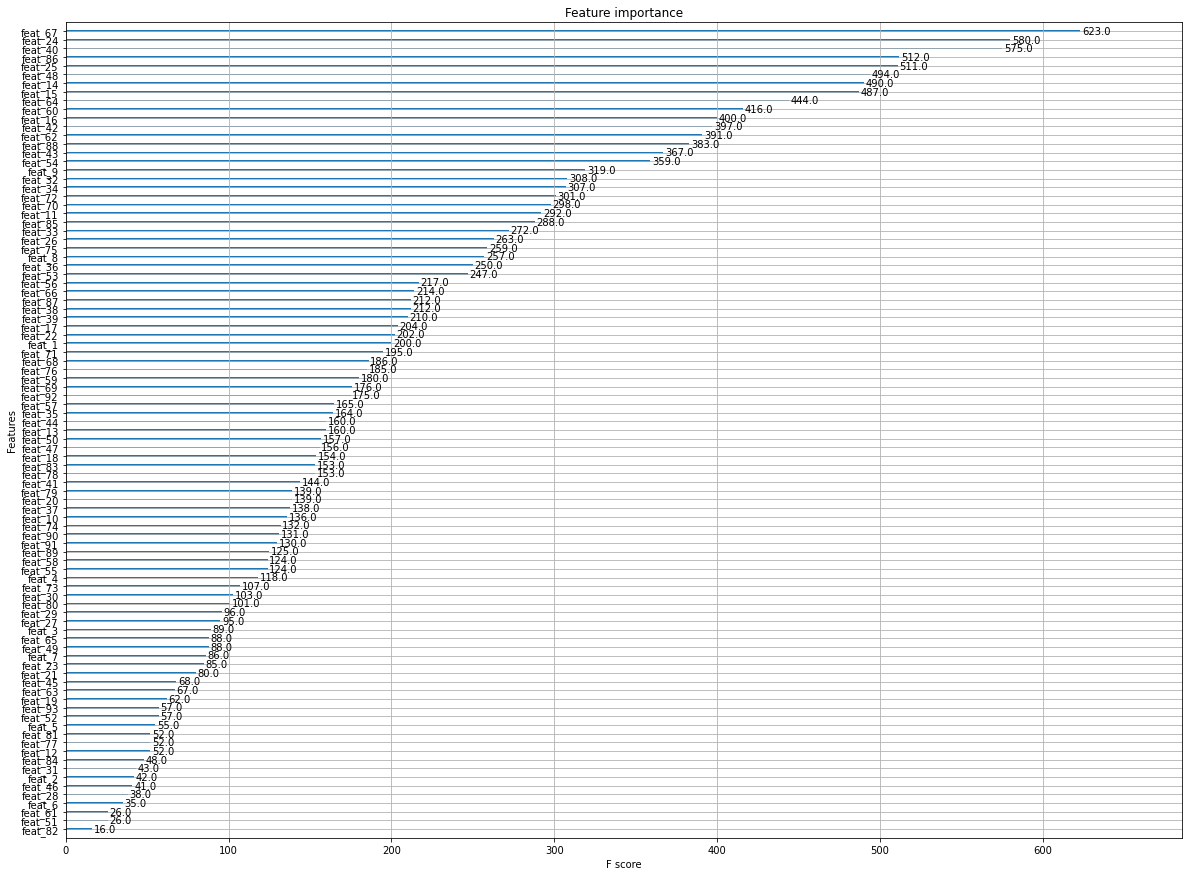

In [106]:
#Appendix - Feature Importance
fig,ax = plt.subplots(figsize=(20,15))
plot_importance(XGB_model, ax=ax)

## LightGBM

In [ ]:
*GBM에서 출발한 알고리즘으로, 두가지의 관점을 제시한다
*1.Gradient-based One-slide Sampling(GOSS): 정보량이 적은것은 제외하고 학습을 진행하자
*2.Exclusive Feature Bundling(EFB): 변수들을 합치자
*leaf-wise tree growth로, tree를 수평이 아닌 '수직'으로 확장하여 leaf node의 개수를 정함
*LightGBM의 리프 중심 트리 분할 방식은 트리의 균형을 맞추지 않고, 최대 손실 값(max delta loss)을 가지는
*리프 노드를 지속적으로 분할하면서 트리의 깊이가 깊어지고 비대칭적인 규칙 트리가 생성됨

In [98]:
import lightgbm as lgb
from lightgbm import plot_importance

In [99]:
start_time = time.time() # 시작 시간 지정
LGB_train = lgb.Dataset(data = X_train, label = y_train) # 학습 데이터를 LightGBM에 맞게 변환
LGB_param = {'max_depth': 10, # tree의 detpth
             'n_estimators': 100, # tree의 반복횟수(생성갯수)
             'objective': 'multiclass', # 목적 함수
#              'num_leaves': 40,
             'num_class': len(set(y_train)) + 1} # 라벨개수(0~개수).
LGB_model = lgb.train(params = LGB_param, train_set = LGB_train) # 학습
LGB_model_predict = np.argmax(LGB_model.predict(X_test), axis = 1) # 테스트

print('LightGBM 정확도: {:.4f}%'.format(accuracy_score(y_test, LGB_model_predict)*100))
print('LightGBM 수행 시간: {:.2f}초'.format(time.time() - start_time))

C:\Users\ppuya\anaconda3\envs\jff\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004494 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3017
[LightGBM] [Info] Number of data points in the train set: 43314, number of used features: 93
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -3.463937
[LightGBM] [Info] Start training from score -1.343054
[LightGBM] [Info] Start training from score -2.032582
[LightGBM] [Info] Start training from score -3.146825
[LightGBM] [Info] Start training from score -3.123469
[LightGBM] [Info] Start training from score -1.480091
[LightGBM] [Info] Start training from score -3.075329
[LightGBM] [Inf

In [95]:
# learning_rate =0,01 (default = 0,1)
start_time = time.time() # 시작 시간 지정
LGB_train = lgb.Dataset(data = X_train, label = y_train) # 학습 데이터를 LightGBM에 맞게 변환
LGB_param = {'max_depth': 10, # tree의 detpth
             'n_estimators': 100, # tree의 반복횟수(생성갯수)
             'objective': 'multiclass', # 목적 함수
             'learning_rate': 0.01,
             'num_class': len(set(y_train)) + 1} # 라벨개수(0~개수).
LGB_model = lgb.train(params = LGB_param, train_set = LGB_train) # 학습
LGB_model_predict = np.argmax(LGB_model.predict(X_test), axis = 1) # 테스트

print('LightGBM 정확도: {:.4f}%'.format(accuracy_score(y_test, LGB_model_predict)*100))
print('LightGBM 수행 시간: {:.2f}초'.format(time.time() - start_time))

C:\Users\ppuya\anaconda3\envs\jff\lib\site-packages\lightgbm\engine.py:177: UserWarning: Found `n_estimators` in params. Will use it instead of argument
  _log_warning(f"Found `{alias}` in params. Will use it instead of argument")


[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004024 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3017
[LightGBM] [Info] Number of data points in the train set: 43314, number of used features: 93
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Info] Start training from score -3.463937
[LightGBM] [Info] Start training from score -1.343054
[LightGBM] [Info] Start training from score -2.032582
[LightGBM] [Info] Start training from score -3.146825
[LightGBM] [Info] Start training from score -3.123469
[LightGBM] [Info] Start training from score -1.480091
[LightGBM] [Info] Start training from score -3.075329
[LightGBM] [Inf

In [ ]:
*결과해석: AdaBoost와 동일한 조건(max_depth = 10, n_estimator=100)으로 진행하였을때보다 성능이 '9%'
    향상되었으며, GBM보단 '0.2% 낮은 성능'으로 거의 비슷해 보인다. GBM과 gradient의 값을 반영시켜 
    잔차를 줄이는 것은 동일하나, light라는 이름이 붙은 만큼 피쳐를 병합해 데이터크기를 작게 만들어
    메모리를 적게 차지하고 이를 통해 LightGBM은\는 GBM에 비해 '170배 이상 빠르게' 훈련 및 테스트 된다.
    
    추가로, learning_rate를 0.1에서 0.01로 감소한 결과를 보면 gradient의 감소가 천천히 일어나 성능이
    더 떨어지는 것을 볼 수 있다. local에 빠질 우려가 있어 낮추었으나, 0.1이 이번데이터엔 더 적절한
    learning rate값임을 알 수 있었다.
    
    (참고) 아래 그림처럼, 변수의 중요도 추출 가능

<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

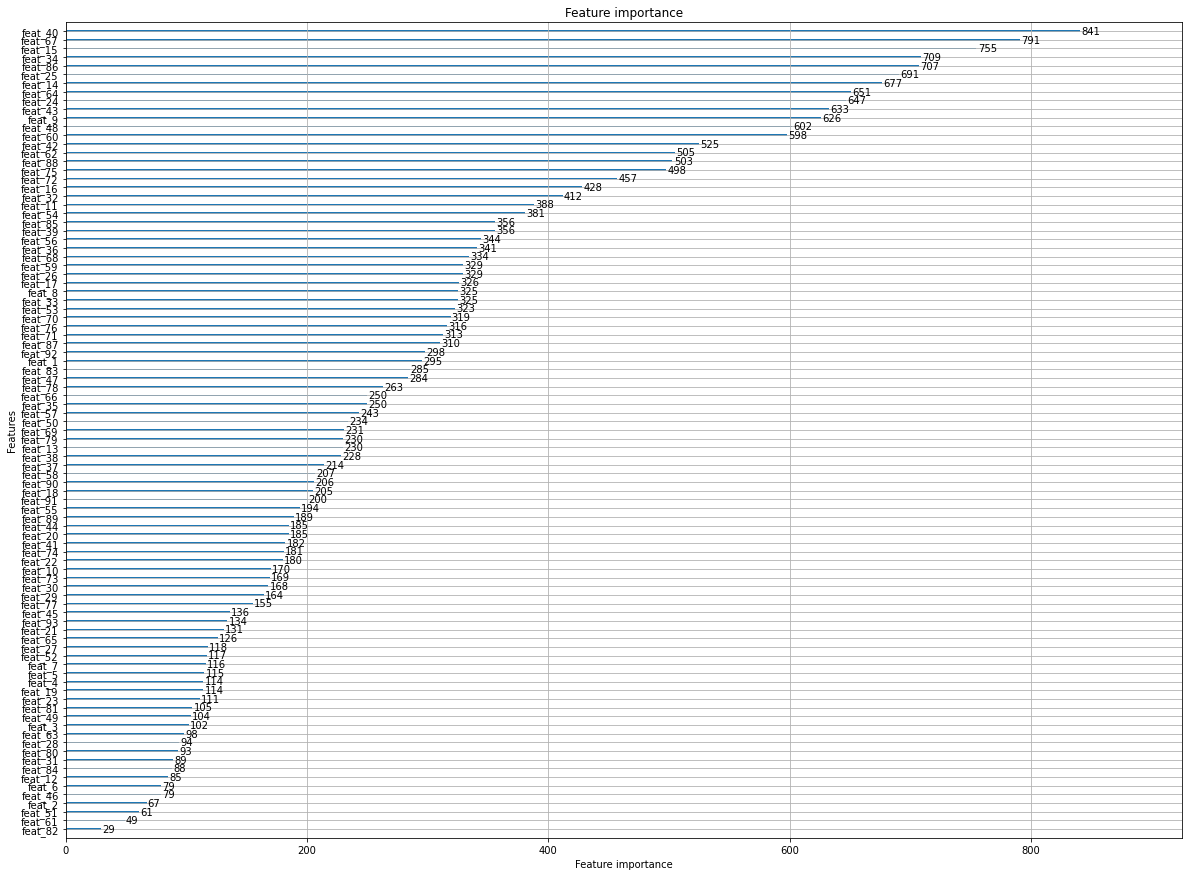

In [100]:
#Appendix - Feature Importance
fig,ax = plt.subplots(figsize=(20,15))
plot_importance(LGB_model, ax=ax)

## CatBoost

In [ ]:
*GBM에서 출발한 알고리즘으로, 'Categorical'데이터의 boosting을 수행하는 모델임
*Issue 1.Predcition Shift: 후반으로 갈수록 초반에 만들어진 모델에 영향을 많이 받는 문제가 발생함
    --> 그 이유는, 동일한 데이터가 여러번 중복학습되기 때문임.
    (Solution): Ordered Boosting: oblivious tree(대칭)구축하고, 제한적인 데이터를 학습에 사용하게 함
            이떄, 각 데이터들에 대해 leaf value와 gradient에 대한 코사인 유사도를 계산해 loss로 사용함!!
*Issue 2.Target Leakage: 2번째 문제는 카테고리변수들은 one-hot encoding을 통해 변환이 되는데
    y값은 그대로 유지되는 문제가 발생함
    (Solution): Ordered Target Statistics: 사전확률값을 도입한 ordered target statistics를 사용하며,
            rare한 noisy categories들의 부정적인 효과를 제거함

In [110]:
import catboost as cb

In [113]:
start_time = time.time() # 시작 시간 지정
CB_train = cb.Pool(data = X_train, label = y_train) # 학습 데이터를 Catboost 모델에 맞게 변환
CB_param = {'max_depth': 10, # tree의 depth
            'n_estimators': 100, # tree의 반복횟수(생성갯수)
            'eval_metric': 'Accuracy', # 평가기준
            'loss_function': 'MultiClass'} # loss function
CB_model = cb.train(pool = CB_train, params = CB_param) # 학습 진행
CB_model_predict = np.argmax(CB_model.predict(X_test), axis = 1) + 1 # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측, 인덱스의 순서를 맞추기 위해 +1

print('CatBoost 정확도: {:.4f}%'.format(accuracy_score(y_test, CB_model_predict)*100))
print('CatBoost 수행 시간: {:.2f}초'.format(time.time() - start_time))

Learning rate set to 0.5
0:	learn: 0.5875698	total: 174ms	remaining: 17.2s
1:	learn: 0.6454264	total: 347ms	remaining: 17s
2:	learn: 0.6769636	total: 511ms	remaining: 16.5s
3:	learn: 0.6932401	total: 675ms	remaining: 16.2s
4:	learn: 0.7074387	total: 853ms	remaining: 16.2s
5:	learn: 0.7164196	total: 1.03s	remaining: 16.1s
6:	learn: 0.7243616	total: 1.2s	remaining: 16s
7:	learn: 0.7351203	total: 1.37s	remaining: 15.8s
8:	learn: 0.7417001	total: 1.53s	remaining: 15.5s
9:	learn: 0.7484185	total: 1.7s	remaining: 15.3s
10:	learn: 0.7522048	total: 1.87s	remaining: 15.1s
11:	learn: 0.7565452	total: 2.04s	remaining: 14.9s
12:	learn: 0.7610011	total: 2.2s	remaining: 14.7s
13:	learn: 0.7632636	total: 2.37s	remaining: 14.6s
14:	learn: 0.7671423	total: 2.54s	remaining: 14.4s
15:	learn: 0.7727525	total: 2.71s	remaining: 14.2s
16:	learn: 0.7758923	total: 2.88s	remaining: 14.1s
17:	learn: 0.7784550	total: 3.05s	remaining: 13.9s
18:	learn: 0.7792169	total: 3.22s	remaining: 13.7s
19:	learn: 0.7837189	to

In [114]:
# learning_rate = 0.1(default=0.5)
start_time = time.time() # 시작 시간 지정
CB_train = cb.Pool(data = X_train, label = y_train) # 학습 데이터를 Catboost 모델에 맞게 변환
CB_param = {'max_depth': 10, # tree의 depth
            'learning_rate': 0.1,
            'n_estimators': 100, # tree의 반복횟수(생성갯수)
            'eval_metric': 'Accuracy', # 평가기준
            'loss_function': 'MultiClass'} # loss function
CB_model = cb.train(pool = CB_train, params = CB_param) # 학습 진행
CB_model_predict = np.argmax(CB_model.predict(X_test), axis = 1) + 1 # 평가 데이터 예측, Softmax의 결과값 중 가장 큰 값의 Label로 예측, 인덱스의 순서를 맞추기 위해 +1

print('CatBoost 정확도: {:.4f}%'.format(accuracy_score(y_test, CB_model_predict)*100))
print('CatBoost 수행 시간: {:.2f}초'.format(time.time() - start_time))

0:	learn: 0.5875698	total: 172ms	remaining: 17s
1:	learn: 0.6168214	total: 338ms	remaining: 16.6s
2:	learn: 0.6313201	total: 506ms	remaining: 16.4s
3:	learn: 0.6422404	total: 675ms	remaining: 16.2s
4:	learn: 0.6514984	total: 842ms	remaining: 16s
5:	learn: 0.6566468	total: 1.02s	remaining: 16s
6:	learn: 0.6696218	total: 1.19s	remaining: 15.8s
7:	learn: 0.6768250	total: 1.36s	remaining: 15.6s
8:	learn: 0.6827815	total: 1.53s	remaining: 15.4s
9:	learn: 0.6875606	total: 1.7s	remaining: 15.3s
10:	learn: 0.6919934	total: 1.87s	remaining: 15.1s
11:	learn: 0.6961491	total: 2.04s	remaining: 15s
12:	learn: 0.6975574	total: 2.21s	remaining: 14.8s
13:	learn: 0.7003740	total: 2.38s	remaining: 14.6s
14:	learn: 0.7030521	total: 2.55s	remaining: 14.4s
15:	learn: 0.7060535	total: 2.71s	remaining: 14.2s
16:	learn: 0.7074387	total: 2.88s	remaining: 14.1s
17:	learn: 0.7100937	total: 3.04s	remaining: 13.9s
18:	learn: 0.7141340	total: 3.21s	remaining: 13.7s
19:	learn: 0.7175971	total: 3.37s	remaining: 13.5s

In [ ]:
*결과해석: AdaBoost와 동일한 조건(max_depth = 10, n_estimator=100)으로 진행하였을때보다 성능이 '6%'
    향상되었으며, GBM보단 '3% 낮은 성능'을 보인다. GBM의 target leakage와 prediction shift 문제점을 
    보완한 모델이 바로 이 CatBoost이다. 해당 데이터에선 값들이 모두 0과1로만 이루어져 있기 때문에
    categorical한 데이터임에도 성능이 더 낮게 나왔음을 볼 수 있다. 데이터의 수가 많고 binary값이 아닌
    데이터를 실험한 결과에선 CatBoost의 성능이 더 좋게 나을 수 있다고 기대해본다.
    마지막으로, CatBoost는 GBM에 비해 '15배 이상 빠르게' 훈련 및 테스트 되는 것을 볼 수 있다.

In [ ]:
*최종실험결과비교(정확도 높은순, base_learner: tree, max_depth=10, n_estimator=100)
1.GBM 정확도: 81.5988%
2.LightGBM 정확도: 81.3995%
3.XGBoost 정확도: 79.5626%
4.CatBoost 정확도: 78.5876%
5.AdaBoost 정확도: 72.4790%